In [6]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualizations
plt.style.use('default')  # Use default style instead of seaborn
sns.set_theme()  # This will set seaborn's default theme

In [7]:
# Cell 2: Load and explore the dataset
# Load the dataset
df = pd.read_csv('dataset/diseases_symptoms.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
display(df.head())

Dataset Shape: (400, 6)

Columns: ['Code', 'Name', 'Symptoms', 'Treatments', 'symptom_count', 'treatment_count']

First few rows:


,Code,Name,Symptoms,Treatments,symptom_count,treatment_count
0,1,Panic disorder,"Palpitations, Sweating, Trembling, Shortness o...","Antidepressant medications, Cognitive Behavior...",6,3.0
1,2,Vocal cord polyp,"Hoarseness, Vocal Changes, Vocal Fatigue","Voice Rest, Speech Therapy, Surgical Removal",3,3.0
2,3,Turner syndrome,"Short stature, Gonadal dysgenesis, Webbed neck...","Growth hormone therapy, Estrogen replacement t...",4,3.0
3,4,Cryptorchidism,"Absence or undescended testicle(s), empty scro...",Observation and monitoring (in cases of mild o...,5,8.0
4,5,Ethylene glycol poisoning-1,"Nausea, vomiting, abdominal pain, General mala...","Supportive Measures, Gastric Decontamination, ...",7,4.0


In [8]:
# Cell 3: Data Preprocessing
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())


Missing Values:
Code               0
Name               0
Symptoms           0
Treatments         1
symptom_count      0
treatment_count    1
dtype: int64

Basic Statistics:
             Code  symptom_count  treatment_count
count  400.000000     400.000000       399.000000
mean   200.500000       4.205000         5.012531
std    115.614301       2.194314         2.541582
min      1.000000       1.000000         1.000000
25%    100.750000       3.000000         3.000000
50%    200.500000       4.000000         4.000000
75%    300.250000       5.000000         6.000000
max    400.000000      12.000000        14.000000


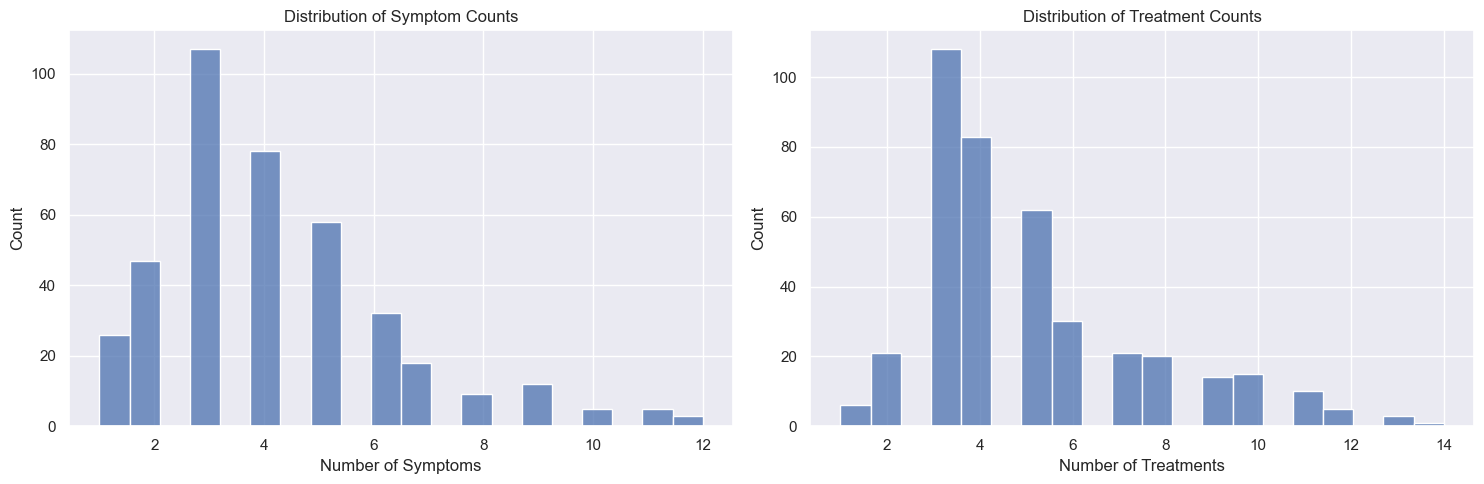

In [9]:
# Cell 4: Disease Distribution Analysis
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot symptom count distribution
sns.histplot(data=df, x='symptom_count', bins=20, ax=ax1)
ax1.set_title('Distribution of Symptom Counts')
ax1.set_xlabel('Number of Symptoms')
ax1.set_ylabel('Count')

# Plot treatment count distribution
sns.histplot(data=df, x='treatment_count', bins=20, ax=ax2)
ax2.set_title('Distribution of Treatment Counts')
ax2.set_xlabel('Number of Treatments')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

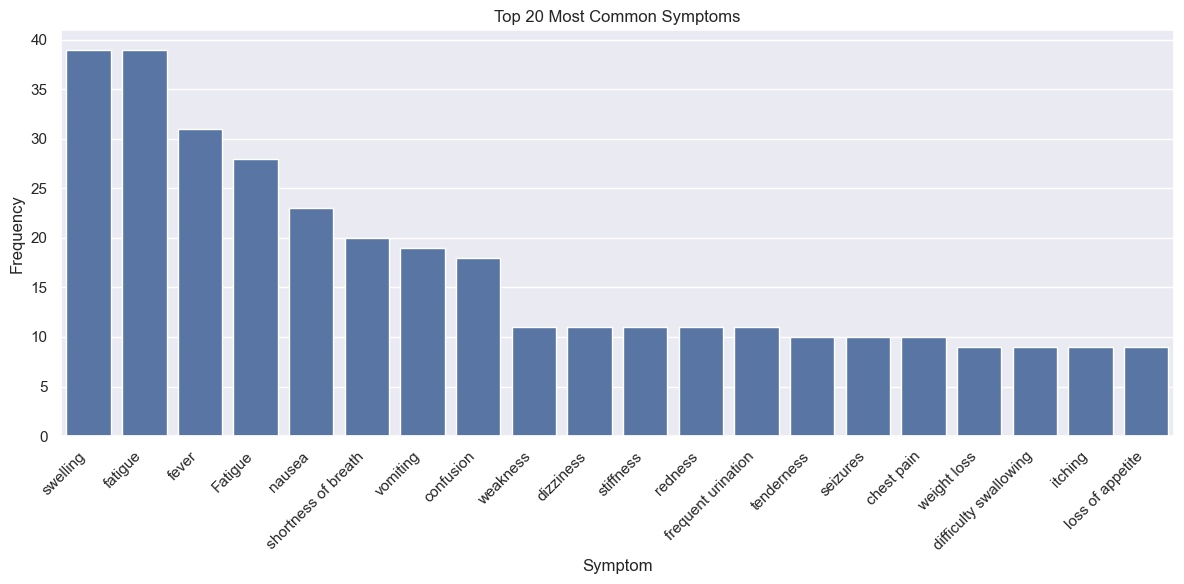

In [10]:
# Cell 5: Symptom Analysis
# Extract all unique symptoms
all_symptoms = []
for symptoms in df['Symptoms']:
    if isinstance(symptoms, str):
        all_symptoms.extend([s.strip() for s in symptoms.split(',')])

# Count symptom frequencies
symptom_counts = pd.Series(all_symptoms).value_counts()

# Plot top 20 most common symptoms
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.head(20).index, y=symptom_counts.head(20).values)
plt.title('Top 20 Most Common Symptoms')
plt.xlabel('Symptom')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

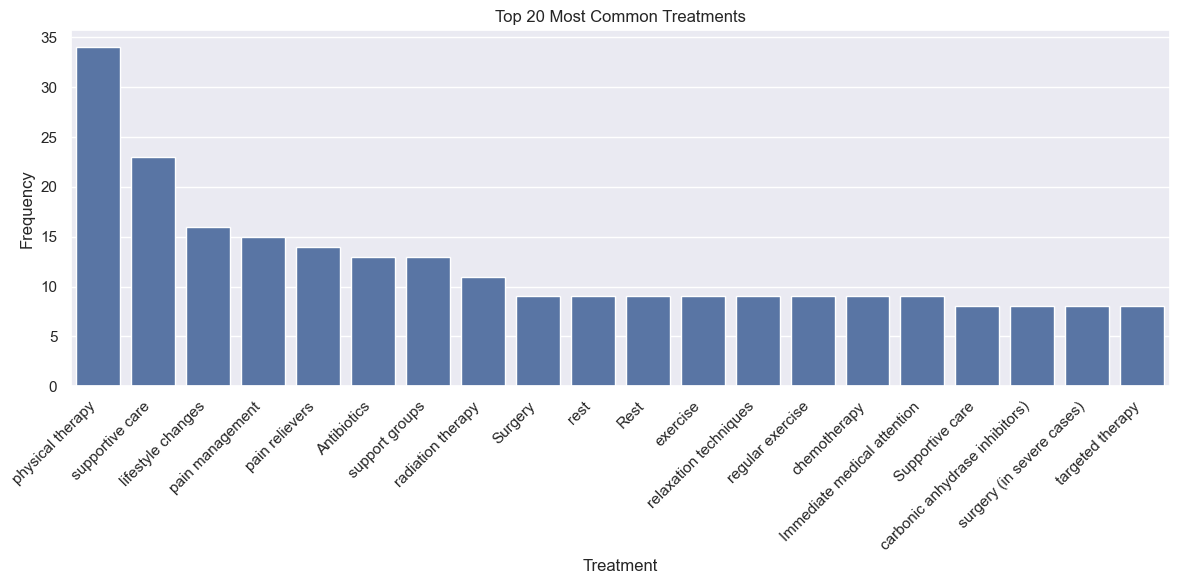

In [11]:

# Cell 6: Treatment Analysis
# Extract all unique treatments
all_treatments = []
for treatments in df['Treatments']:
    if isinstance(treatments, str):
        all_treatments.extend([t.strip() for t in treatments.split(',')])

# Count treatment frequencies
treatment_counts = pd.Series(all_treatments).value_counts()

# Plot top 20 most common treatments
plt.figure(figsize=(12, 6))
sns.barplot(x=treatment_counts.head(20).index, y=treatment_counts.head(20).values)
plt.title('Top 20 Most Common Treatments')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Cell 7: Prepare Data for Model Training
# Create a binary matrix for symptoms
def create_symptom_matrix(df):
    # Get all unique symptoms
    all_symptoms = set()
    for symptoms in df['Symptoms']:
        if isinstance(symptoms, str):
            all_symptoms.update([s.strip() for s in symptoms.split(',')])
    
    # Create binary matrix
    symptom_matrix = pd.DataFrame(0, 
                                index=df.index, 
                                columns=sorted(list(all_symptoms)))
    
    # Fill the matrix
    for idx, symptoms in enumerate(df['Symptoms']):
        if isinstance(symptoms, str):
            for symptom in symptoms.split(','):
                symptom_matrix.loc[idx, symptom.strip()] = 1
    
    return symptom_matrix

# Create the symptom matrix
symptom_matrix = create_symptom_matrix(df)

# Display the shape and a sample of the matrix
print("Symptom Matrix Shape:", symptom_matrix.shape)
print("\nSample of Symptom Matrix:")
display(symptom_matrix.head())


Symptom Matrix Shape: (400, 1000)

Sample of Symptom Matrix:


,Abdominal or back pain,Abdominal or flank pain,Abdominal pain,Abdominal pain (often in the upper right quadrant),Abdominal pain or discomfort,Abnormal positioning of the urethral opening on the underside of the penis,Abnormal vaginal bleeding,Abnormal vaginal bleeding outside of the menstrual period,Absence or undescended testicle(s),Altered perception of reality,...,weight gain or loss,weight loss,wheezing,white,with associated swelling,withdrawal symptoms (such as irritability,withdrawal symptoms (such as nausea,withdrawal symptoms (such as rebound anxiety,withdrawal symptoms (such as tremors,worsens with deep breaths or lying down
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Cell 8: Save Processed Data
# Save the symptom matrix
symptom_matrix.to_csv('dataset/processed_symptom_matrix.csv', index=False)
print("Symptom matrix saved successfully!")

Symptom matrix saved successfully!
